<img src="http://image.yes24.com/momo/TopCate1829/MidCate004/182839873.JPG" width=50%>

> 작성자 : BOAZ 12기 분석 [성민석(Minsuk Sung)](https://github.com/mssung94)  
> 연락처 : mssung94@gmail.com  
> GitHub : https://github.com/mssung94/Hands-On-MachineLearning

> 본 내용은 **대학생 빅데이터 동아리 `BOAZ`의 핸즈온 머신러닝 스터디 (머신러닝 파트) 자료**입니다. **상업적인 목적으로 사용하는 것은 절대로 금합니다.**

> 모든 내용은 `핸즈온 머신러닝(Hands-On Machine Learning with Scikit-Learn & Tensorflow),한빛미디어`을 참고하여 만들어졌으며, 책의 내용에 대한 모든 저작권은 `한빛미디어`에게 있음을 미리 밝힙니다. 또한 여기에 사용된 코드는 [한빛미디어에서 제공해준 GitHub](https://github.com/rickiepark/handson-ml)과 [ExcelsiorCJH님의 GitHub](https://github.com/ExcelsiorCJH/Hands-On-ML)을 바탕으로 재구성하였습니다.

한빛미디어 홈페이지 : http://www.hanbit.co.kr/store/books/look.php?p_code=B9267655530  
핸즈온 머신러닝 GitHub : https://github.com/rickiepark/handson-ml

In [34]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

# 한글출력
# matplotlib.rc('font', family='AppleGothic') # macOS
matplotlib.rc('font', family='Malgun Gothic') # Windows
plt.rcParams['axes.unicode_minus'] = False

# 머신러닝 프로젝트 처음부터 끝까지

<h1>강의 내용<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#머신러닝-프로젝트-처음부터-끝까지" data-toc-modified-id="머신러닝-프로젝트-처음부터-끝까지-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>머신러닝 프로젝트 처음부터 끝까지</a></span><ul class="toc-item"><li><span><a href="#실제-데이터로-작업하기" data-toc-modified-id="실제-데이터로-작업하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>실제 데이터로 작업하기</a></span></li><li><span><a href="#큰-그림-보기" data-toc-modified-id="큰-그림-보기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>큰 그림 보기</a></span><ul class="toc-item"><li><span><a href="#문제-정의" data-toc-modified-id="문제-정의-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>문제 정의</a></span></li><li><span><a href="#성능-측정-지표-선택" data-toc-modified-id="성능-측정-지표-선택-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>성능 측정 지표 선택</a></span><ul class="toc-item"><li><span><a href="#평균-제곱근-오차(RMSE,-Root-Mean-Square-Error)" data-toc-modified-id="평균-제곱근-오차(RMSE,-Root-Mean-Square-Error)-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span><strong>평균 제곱근 오차</strong>(RMSE, Root Mean Square Error)</a></span></li><li><span><a href="#평균-절대-오차(MAE,-Mean-Absolute-Error)" data-toc-modified-id="평균-절대-오차(MAE,-Mean-Absolute-Error)-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>평균 절대 오차(MAE, Mean Absolute Error)</a></span></li></ul></li><li><span><a href="#가정-검사" data-toc-modified-id="가정-검사-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>가정 검사</a></span></li></ul></li><li><span><a href="#데이터-가져오기" data-toc-modified-id="데이터-가져오기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 가져오기</a></span><ul class="toc-item"><li><span><a href="#작업환경-만들기" data-toc-modified-id="작업환경-만들기-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>작업환경 만들기</a></span></li><li><span><a href="#데이터-다운로드" data-toc-modified-id="데이터-다운로드-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>데이터 다운로드</a></span></li><li><span><a href="#데이터-구조-훑어보기" data-toc-modified-id="데이터-구조-훑어보기-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>데이터 구조 훑어보기</a></span></li><li><span><a href="#테스트-세트-만들기" data-toc-modified-id="테스트-세트-만들기-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>테스트 세트 만들기</a></span></li></ul></li><li><span><a href="#데이터-이해를-위한-탐색과-시각화" data-toc-modified-id="데이터-이해를-위한-탐색과-시각화-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>데이터 이해를 위한 탐색과 시각화</a></span><ul class="toc-item"><li><span><a href="#지리적-데이터-시각화" data-toc-modified-id="지리적-데이터-시각화-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>지리적 데이터 시각화</a></span></li><li><span><a href="#상관관계-조사" data-toc-modified-id="상관관계-조사-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>상관관계 조사</a></span></li><li><span><a href="#특성-조합으로-실험" data-toc-modified-id="특성-조합으로-실험-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>특성 조합으로 실험</a></span></li></ul></li><li><span><a href="#머신러닝-알고리즘을-위한-데이터-준비" data-toc-modified-id="머신러닝-알고리즘을-위한-데이터-준비-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>머신러닝 알고리즘을 위한 데이터 준비</a></span><ul class="toc-item"><li><span><a href="#데이터-정제" data-toc-modified-id="데이터-정제-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>데이터 정제</a></span></li><li><span><a href="#텍스트와-범주형-특성-다루기" data-toc-modified-id="텍스트와-범주형-특성-다루기-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>텍스트와 범주형 특성 다루기</a></span></li><li><span><a href="#나만의-변환기" data-toc-modified-id="나만의-변환기-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>나만의 변환기</a></span></li><li><span><a href="#특성-스케일링" data-toc-modified-id="특성-스케일링-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>특성 스케일링</a></span></li><li><span><a href="#변환-파이프라인" data-toc-modified-id="변환-파이프라인-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>변환 파이프라인</a></span></li></ul></li><li><span><a href="#모델-선택과-훈련" data-toc-modified-id="모델-선택과-훈련-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 선택과 훈련</a></span><ul class="toc-item"><li><span><a href="#훈련-세트에서-훈련하고-평가하기" data-toc-modified-id="훈련-세트에서-훈련하고-평가하기-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>훈련 세트에서 훈련하고 평가하기</a></span></li><li><span><a href="#교차-검증을-사용한-평가" data-toc-modified-id="교차-검증을-사용한-평가-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>교차 검증을 사용한 평가</a></span></li></ul></li><li><span><a href="#모델-세부-튜닝" data-toc-modified-id="모델-세부-튜닝-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 세부 튜닝</a></span><ul class="toc-item"><li><span><a href="#그리드-탐색" data-toc-modified-id="그리드-탐색-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>그리드 탐색</a></span></li><li><span><a href="#랜덤-탐색" data-toc-modified-id="랜덤-탐색-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>랜덤 탐색</a></span></li><li><span><a href="#앙상블-방법" data-toc-modified-id="앙상블-방법-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>앙상블 방법</a></span></li><li><span><a href="#최상의-모델과-오차-분석" data-toc-modified-id="최상의-모델과-오차-분석-2.7.4"><span class="toc-item-num">2.7.4&nbsp;&nbsp;</span>최상의 모델과 오차 분석</a></span></li><li><span><a href="#테스트로-시스템-평가하기" data-toc-modified-id="테스트로-시스템-평가하기-2.7.5"><span class="toc-item-num">2.7.5&nbsp;&nbsp;</span>테스트로 시스템 평가하기</a></span></li></ul></li><li><span><a href="#론칭,-모니터링,-그리고-시스템-유지-보수" data-toc-modified-id="론칭,-모니터링,-그리고-시스템-유지-보수-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>론칭, 모니터링, 그리고 시스템 유지 보수</a></span></li><li><span><a href="#참고" data-toc-modified-id="참고-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>참고</a></span></li></ul></li></ul></div>

---

## 실제 데이터로 작업하기

이 장에서는 [StatLib 저장소에 있는 캘리포니아 주택 가격 데이터셋](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)을 사용하여 진행하도록 함

![](https://tensorflowkorea.files.wordpress.com/2018/05/e18489e185b3e1848fe185b3e18485e185b5e186abe18489e185a3e186ba-2018-05-30-e1848be185a9e18492e185ae-11-51-37.png?w=625)

---

## 큰 그림 보기

> 머신러닝 프로젝트 체크리스트(p625)

### 문제 정의

> Q. 비즈니스의 목적이 정확히 무엇?  
> Q. 현재 솔루션은 어떻게 구성?

### 성능 측정 지표 선택

#### **평균 제곱근 오차**(RMSE, Root Mean Square Error)  
회귀에서 많이 사용되는 성능 측정 지표

$$
\text{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1}{\left( h \left(\mathbf{x}^{(i)} \right) - y^{(i)} \right)^{2}}}
$$

#### 평균 절대 오차(MAE, Mean Absolute Error)
회귀에서 많이 사용되는 성능 측정 지표

$$ \text{MAE}(\mathbf{X}, h) = \frac{1}{m}\sum^{m}_{i=1}\left\lvert{{\left( h \left(\mathbf{x}^{(i)} \right) - y^{(i)} \right)}}\right\lvert $$

### 가정 검사

- 지금까지 만든 가정을 나열하고 검사해보는 것이 좋음

---

## 데이터 가져오기

### 작업환경 만들기

- Anaconda를 통해서 Jupyter Notebook 실행하자
- 이 부분은 생략함

### 데이터 다운로드

- [여기](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)에서 데이터 다운로드 가능

### 데이터 구조 훑어보기

In [3]:
housing = pd.read_csv('../datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


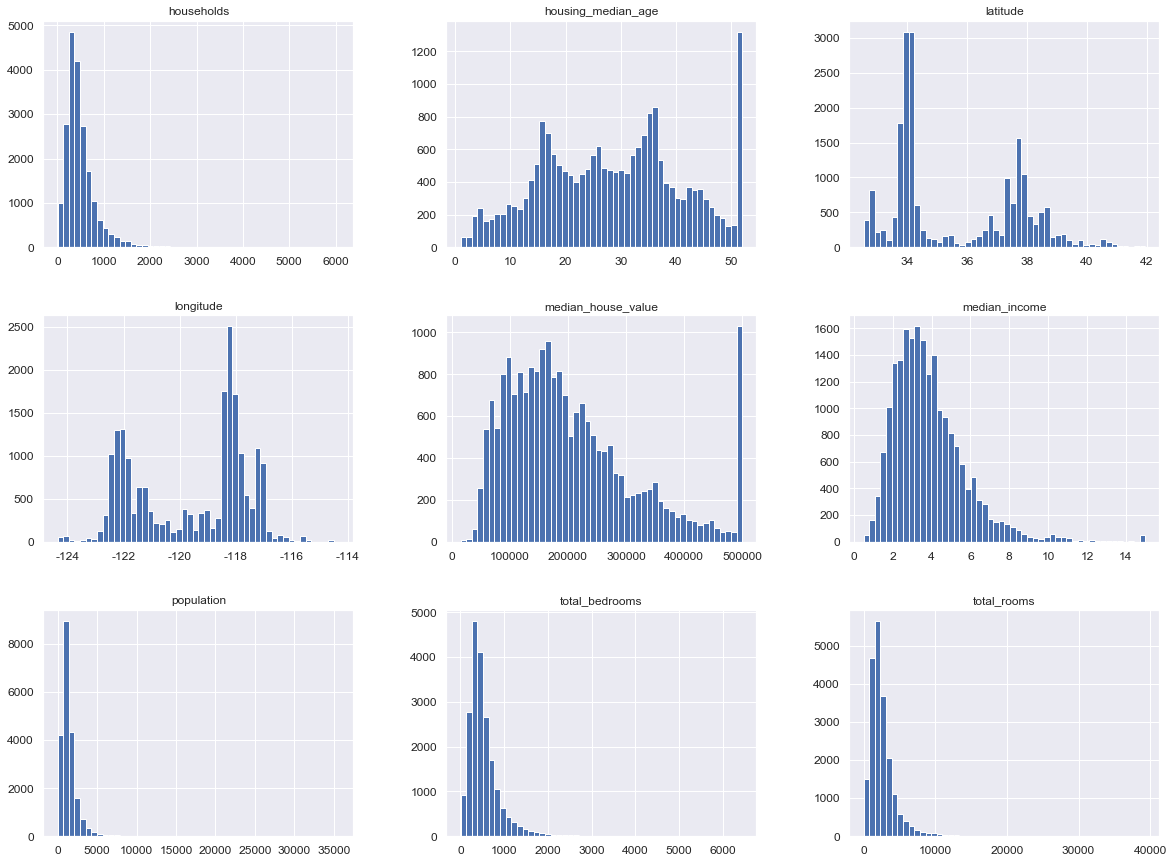

In [6]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### 테스트 세트 만들기

책에서 소개한 방법은 아래와 같이 총 3가지 방법이 있지만 여기서는 맨 아래 방법만 진행할 것

- np.random.permutaion을 이용해 Train/Test set 나누기
- zlib의 crc32를 이용한 Train/Test set 나누기
- **sklearn의 train_test_split을 이용한 Train/Test set 나누기**

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [8]:
train_set.shape

(16512, 10)

In [9]:
test_set.shape

(4128, 10)

> sklearn의 StratifiedShuffleSplit을 이용한 Train/Test set 나누기

Train/Test set이 각 데이터를 대표할 수 있도록 고르게 샘플링 되기 위해서 `계층적 샘플링(stratified sampling)` 을 사용할 수 있다. 계층적 샘플링은 전체 모수를 계층으로 나눠 각 계층마다 샘플링을 하는 방법을 말한다.

캘리포니아 주택가격 데이터셋에서는 Train/Test set을 `median_income`을 기준으로 계층적 샘플링을 통해 Train/Test set을 나눈다.

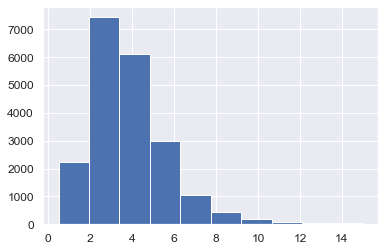

In [10]:
housing['median_income'].hist()
plt.show()

In [11]:
# income 카테고리 개수를 제한하기 위해 1.5로 나눔
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [18]:
(housing["income_cat"].value_counts() / len(housing["income_cat"])).sort_index()

1.0    0.039826
2.0    0.318847
3.0    0.350581
4.0    0.176308
5.0    0.114438
Name: income_cat, dtype: float64

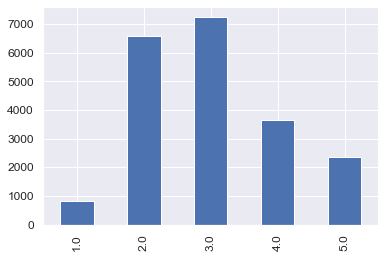

In [17]:
housing["income_cat"].value_counts().sort_index().plot(kind='bar')
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
housing['income_cat'].value_counts().sort_index() / len(housing)

1.0    0.039826
2.0    0.318847
3.0    0.350581
4.0    0.176308
5.0    0.114438
Name: income_cat, dtype: float64

In [25]:
# 모집단과 비슷
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

1.0    0.039729
2.0    0.318798
3.0    0.350533
4.0    0.176357
5.0    0.114583
Name: income_cat, dtype: float64

> Random과 Stratified Sampling 비교 해보기

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [27]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

In [29]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [30]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [31]:
# 분석에 필요없는 'income_cat' Column 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

---

## 데이터 이해를 위한 탐색과 시각화

Train set에 대해서만 진행

In [32]:
housing = strat_train_set.copy()

### 지리적 데이터 시각화

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


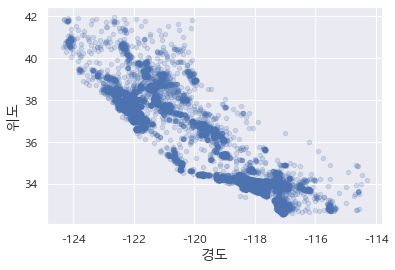

In [36]:
ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
plt.show()

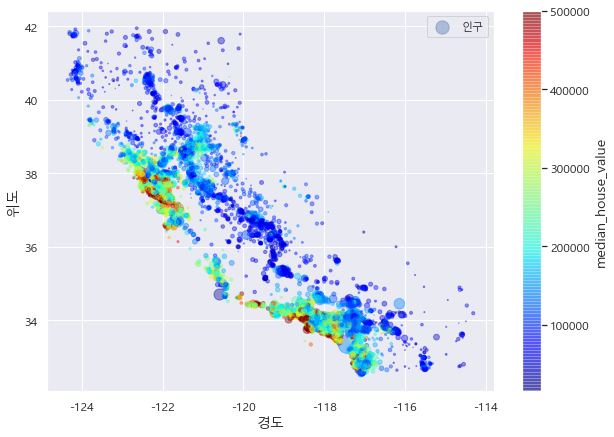

In [38]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing["population"]/100, label="인구", figsize=(10, 7),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                  sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()
plt.show()

- 주택 가격은 지역과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있었음

### 상관관계 조사

특성(feature)간의 **표준 상관계수**(standard correlation coefficient, 피어슨의 $r$) `corr()`를 사용한다.

In [39]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

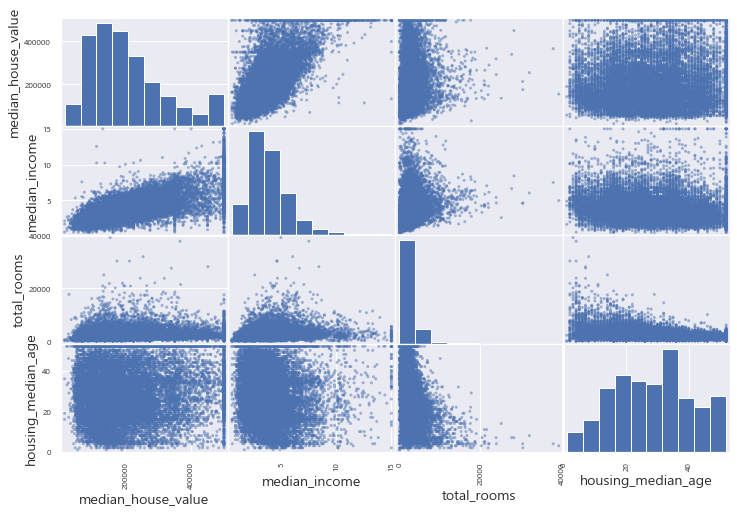

In [41]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


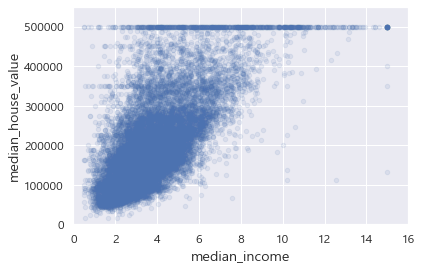

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

### 특성 조합으로 실험

---

## 머신러닝 알고리즘을 위한 데이터 준비

### 데이터 정제

### 텍스트와 범주형 특성 다루기

### 나만의 변환기

### 특성 스케일링

### 변환 파이프라인

---

## 모델 선택과 훈련

### 훈련 세트에서 훈련하고 평가하기

### 교차 검증을 사용한 평가

---

## 모델 세부 튜닝

### 그리드 탐색

### 랜덤 탐색

### 앙상블 방법

### 최상의 모델과 오차 분석

### 테스트로 시스템 평가하기

---

## 론칭, 모니터링, 그리고 시스템 유지 보수

---

## 참고

- http://www.hanbit.co.kr/store/books/look.php?p_code=B9267655530
- http://www.yes24.com/Product/Goods/59878826
- https://github.com/rickiepark/handson-ml
- https://github.com/ExcelsiorCJH/Hands-On-ML
- https://github.com/ExcelsiorCJH/Hands-On-ML
- https://www.slideshare.net/RickyPark3/1-103084847
- https://tensorflow.blog/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EC%9E%A5-2%EC%9E%A5/1-%ED%95%9C%EB%88%88%EC%97%90-%EB%B3%B4%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/